<h1 style="text-align: center;">Block Diagrams and System Stability</h1>
<p style="text-align: center;">Lab 7</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Become familiar with Laplace-domain block diagrams and use the factored form of the transfer function to judge system stability. 

### 2. Deliverables Overview 
##### Part 1  
[ ] Equations for the transfer functions in **Task 1**.  
[ ] Printed output using **scipy.signal.tf2zpk()** for **Task 2**.  
[ ] Equation of the open-loop transfer function for **Task 3**
[ ] Plot showing the step response of the open-loop transfer function for **Task 4**.
  
##### Part 2
[ ] Equation of the closed-loop transfer function for **Task 1**
[ ] Printed output and numerical equations using **scipy.signal.tf2zpk()** for **Task 2**.  
[ ] Plot showing the step response of the open-loop transfer function for **Task 3**. 

![Block diagram](BlockDiagram1.png)

$$ G(s) = \frac{s + 9}{(s^2 - 6s - 16)(s + 4)} $$  
$$ A(s) = \frac{s + 4}{s^2 + 4s +3} $$  
$$ B(s) = s^2 + 26s + 168 $$

### 3. Part 1
##### 3.1 Purpose
Analyze a block diagram and learn how to use Python functions to perform the same analysis.  
##### 3.2 Tasks   
1. Type $G(s)$, $A(s)$, and $B(s)$ in factored form, isolating the poles and zeros. Identify the poles and zeros of each function.

Factored form of $G(s)$:  
>$G(s) = \frac{s+9}{(s+2)(s-8)(s+4)}$

Factored form of $A(s)$:  
>$A(s) = \frac{s+4}{(s+1)(s+3)}$ 

Factored form of $B(s)$:  
>$B(s) = (s+12)(s+14)$

Poles of $G(s)$:  
> -2, -4, 8

Poles of $A(s)$:  
> -1, -3

Poles of $B(s)$:  
> None

Zeros of $G(s)$:  
> -9

Zeros of $A(s)$:  
> -4

Zeros of $B(s)$:  
> -12, -14

###### 3.2.1 Example Code  
The following example code uses **scipy.signal.convolve()** to expand a factored transfer function, described by $H(s) = \frac{(8s + 1)(2s +3)}{(9s^2 + 2s)(s + 4)}$.

In [5]:
import scipy.signal as sig

num = sig.convolve([8, 1], [2, 3])
den = sig.convolve([9, 2, 0], [1, 4])

print(f"Expanded Numerator: {num}\nExpanded Denominator: {den}")

Expanded Numerator: [16 26  3]
Expanded Denominator: [ 9 38  8  0]


Making the expanded transfer function $H(s) = \frac{16s^2 + 26s + 3}{9s^3 + 38s^2 + 8s}$.  

2. Use the **scipy.signal.tf2zpk()** function to check your results from **Task 1** and print the output. *Note: since $B(s)$ has a denominator of 1, you may use **numpy.roots()** instead*.

In [21]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

In [29]:
numG = [1, 9]
denG = sig.convolve([1, -6, -16], [1, 4])
Gz, Gp, Gk = sig.tf2zpk(numG, denG)

numA = [1, 4]
denA = [1, 4, 3]
Az, Ap, Ak = sig.tf2zpk(numA, denA)

B = [1, 26, 168]
Bz = np.roots(B)

print(f"Poles of G(s): {Gp}\nZeroes of G(s): {Gz}")
print(f"Poles of A(s): {Ap}\nZeroes of A(s): {Az}")
print(f"Poles of B(s): None\nZeroes of B(s): {Bz}")

Poles of G(s): [ 8. -4. -2.]
Zeroes of G(s): [-9.]
Poles of A(s): [-3. -1.]
Zeroes of A(s): [-4.]
Poles of B(s): None
Zeroes of B(s): [-14. -12.]


3. Type and properly format the open-loop transfer function where $x(t)$ is the input and $y(t)$ is the output. Keep your answer in factored form.

Insert the open-loop transfer function here:  
$$ H(s) = A(s)*G(s)$$

4. Plot the step response of the open-loop transfer function. Use **scipy.signal.convolve()** to expand the numerator and denominator of the open-loop transfer function. 

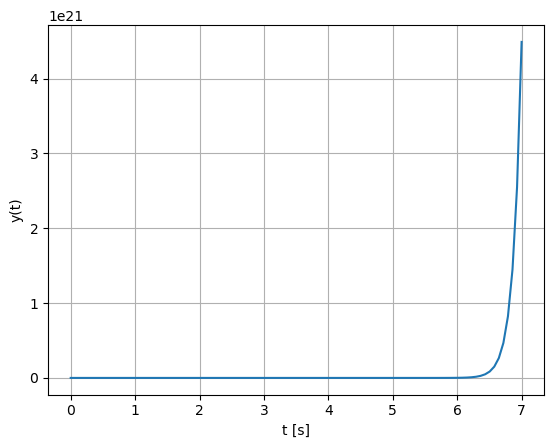

In [45]:
numH = sig.convolve(numA, numG)
denH = sig.convolve(denA, denG)

tout, yout = sig.step((numH, denH))

plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.show()

### 4. Part 2
##### 4.1 Purpose
Become more familiar with using Python for analyzing block diagrams and stability of closed-loop systems.
##### 4.2 Tasks   
1. Type the closed-loop transfer function for the given block diagram symbolically in terms of each blocks numerator and denominator (i.e., numG, denG, ...).

Insert the closed-loop transfer function here:  
$$ H(s) = A(s)*\frac{G(s)}{1+B(s)*G(s)}$$

2. Using **scipy.signal.convolve()** and **scipy.signal.tf2zpk()** to perform all the arithmetic, find numerical values for the total numerator and denominator, find poles and zeros, then type the resulting numeric transfer function in both expanded and factored form.

In [54]:
numH = sig.convolve(numA, numG)

denAG = sig.convolve(denA, denG)
S1 = sig.convolve(denA, numG)
S2 = sig.convolve(S1, B)
denH = denAG + S2

print(f"Expanded Numerator: {numH}\nExpanded Denominator: {denH}")

Hz, Hp, Hk = sig.tf2zpk(numH, denH)

print(f"Poles of H(s): {Hp}\nZeroes of H(s): {Hz}")

Expanded Numerator: [ 1 13 36]
Expanded Denominator: [   2   41  500 2995 6878 4344]
Poles of H(s): [-5.16237064+9.51798197j -5.16237064-9.51798197j -6.17525872+0.j
 -3.        +0.j         -1.        +0.j        ]
Zeroes of H(s): [-9. -4.]


Insert the expanded numeric closed-loop transfer function here:  
$$ H(s) = \frac{s^2+13s+36}{2s^5+41s^4+500s^3+2995s^2+6878s+4344}$$

Insert the factored numeric closed-loop transfer function here:  
$$ H(s) = \frac{(s+9)(s+4)}{(s+5.16-9.52j)(s+5.16+9.52j)(s+6.18)(s+3)(s+1)}$$

3. Plot the step response of the closed-loop transfer function using **scipy.signal.step()**.

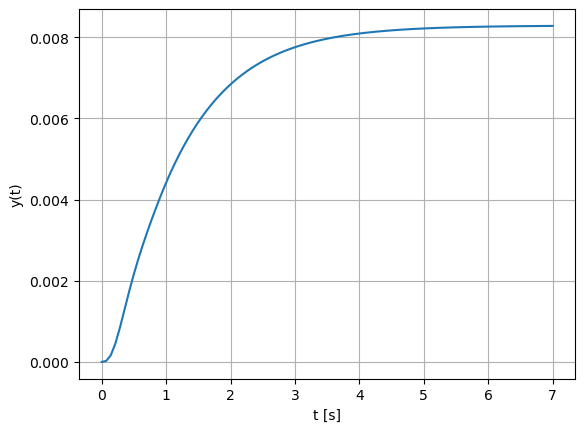

In [59]:
tout, yout = sig.step((numH, denH))

plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.show()

### 5. Questions
1. Considering the expression found in **Part 1, Task 3**, is the open-loop response stable? Explain why or why not.    
>It is not stable since one of the poles of G(s) are positive. This will mess up the open-loop response since the rest of the poles of G(s) and A(s) are negative.
2. Does the plot from **Part 1, Task 4** support your answer to **Question 1**? Explain how or how it does not.  
>It does support my answer since a stable response would not have a sharp exponential in its growth.
3. In **Part 1, Task 4**, why does convolving the factored terms using **scipy.signal.convolve()** result in the expanded form of the numerator and denominator? Would this work with your user-defined convolution function from **Lab 3**? Why or why not?  
>This is because convolution is pretty much just multiplying the arrays together to its simplest form. For that reason, I am sure the user-defined convolution should also work.
4. Using the closed-loop transfer function found in **Part 2, Task 1**, is the closed-loop response stable? Explain why or why not.
>It is stable since all the poles are negative.  
5. Does the result from **Part 2, Task 3** support your answer to **Question 4**? Explain how or how it does not.  
>It does since the plot is a gradual, increasing root equation.
6. What is the difference between **scipy.signal.residue()** used in **Lab 6** and **scipy.signal.tf2zpk()** used in this lab?  
>residue would perform partial fraction expansion on a function, whereas tf2zpk gives the poles and zeroes of a function.
7. Is it possible for an open-loop system to be stable? What about for a closed-loop system to be unstable? Explain how or how it is not for each.  
>Both scenarios can happen since their stability is dependent upon the poles of the functions used to be either all positive or negative.
8. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>No feedback necessary.